# Logistics - (Reinforcement Learning)

## Step - 1 : Building the environment 

Visualizing the graph using <b>"networkx"</b>.<br>
Networkx is a Python package used to study the structure and dynamics of infrastructure networks.

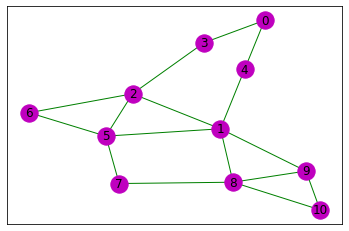

In [8]:
import numpy as np
import pylab as plt
import networkx as nx
 
#Initializing points
# points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]
points_list = [(0,4), (0,3), (4,1), (3,2), (2,1), (1,5), (2,5), (2,6), (6,5), (1,9), (1,8), (9,8), (5,7), (7,8), (9,10), (8,10)]
 
goal = 10
mapping={0:'Start', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9', 10:'10-Destination'}
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G,k=.5,center=points_list[2])
nx.draw_networkx_nodes(G,pos,node_color='m')
nx.draw_networkx_edges(G,pos,edge_color='g')
nx.draw_networkx_labels(G,pos)
plt.show()

## Step 2 - Creating Reward Matrix 

we take a numPy matrix and assign the rewards to be -1 by default.<br>
Only the viable paths will be set to 0, while the maximum reward-giving path leading directly to the goal will be set to 150.<br> The reward matrix helps the bot take the best action that will eventually lead it to its goal.

In [9]:
NO_OF_POINTS = 11
 
#Inititlaizing R Matrix
R = np.matrix(np.ones(shape=(NO_OF_POINTS, NO_OF_POINTS)))
R *= -1
 
for point in points_list:
    if point[1] == goal:
        R[point] = 150
    else:
        R[point] = 0
 
    if point[0] == goal:
        R[point[::-1]] = 150
    else:
        R[point[::-1]]= 0

R[goal,goal]= 150
print(R)

[[ -1.  -1.  -1.   0.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.   0.  -1.   0.   0.  -1.  -1.   0.   0.  -1.]
 [ -1.   0.  -1.   0.  -1.   0.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [  0.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.   0.  -1.  -1.  -1.   0.   0.  -1.  -1.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0. 150.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1. 150.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.   0. 150.]]


## Step 3 - Creating the Q matrix 

If Gamma is set closer to zero, the agent will be more inclined towards immediate rewards, whereas if set closer to 1, the agent will consider future rewards with greater weight.


In [12]:
Q = np.matrix(np.zeros([NO_OF_POINTS,NO_OF_POINTS]))
 
# The gamma parameter
gamma = 0.8
 
initial_state = 1
 
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act
 
available_act = available_actions(initial_state)
 
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action
 
action = sample_next_action(available_act)

def update(current_state, action, gamma):
 
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if (max_index.shape[0] > 1):
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
        
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
#     print('max_value', R[current_state, action] + gamma * max_value)

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

print(update(initial_state, action, gamma))

0


## Step 4 - Training the model 

 The purpose of training is to enhance the knowledge base of our Q matrix. 

In [14]:
scores = []

for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
#     print ('Score:', str(score))

print("Trained Q matrix:")
display(Q/np.max(Q)*100)

Trained Q matrix:


matrix([[  0.        ,   0.        ,   0.        ,  40.95563661,
          51.18772797,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,  51.18772797,   0.        ,
          51.18772797,  51.18772797,   0.        ,   0.        ,
          79.99147776,  80.        ,   0.        ],
        [  0.        ,  63.99318221,   0.        ,  40.95563661,
           0.        ,  51.19454577,  40.95563661,   0.        ,
           0.        ,   0.        ,   0.        ],
        [ 40.95018238,   0.        ,  51.19454577,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ],
        [ 40.91087354,  64.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ],
        [  0.        ,  63.99318221,  51.19454577,   0.        ,
           0.        ,   

## Step 5 - Testing the Model 

Now its time to test our model and see whether it results in the shortest path <br>
<b>Note:</b> Try changing the current_state to different nodes and check the results.

In [19]:
current_state = 6
steps = [current_state]
 
while current_state != 10:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
 
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index
    
print("Most efficient path:")
print(steps)

Most efficient path:
[6, 5, 7, 8, 10]


## Use Cases 

Using Q learning we have identified the efficient path from source to destination. Now the same approach can be used in transportation industry to eliminate the delay, fuel cost and find the shortest path.